In [17]:
import mlflow
from mlflow.entities import ViewType
import seaborn as sns
from IPython.display import Image, display
import pandas as pd
from pathlib import Path

In [18]:
mlflow.get_registry_uri()
savepath = Path("~/Documents/MA/ma_latex/images/40_design/").expanduser()

In [19]:
best_run_ids = []

In [20]:
five_thirty_eight = [
    "#30a2da",
    "#fc4f30",
    "#e5ae38",
    "#6d904f",
    "#8b8b8b",
]

sns.set_palette(five_thirty_eight)

In [21]:
experiment = mlflow.get_experiment_by_name("v2_E2E_Validation")
runs = mlflow.search_runs(
    experiment_ids=experiment.experiment_id,
    run_view_type=ViewType.ACTIVE_ONLY,
    output_format="pandas",
)
dataset_all_runs = runs[runs["params.experiment.dataset"].isin(["all"])]
presentation_dataset = dataset_all_runs.copy()[
    [
        "metrics.mean_precision_0",
        "metrics.mean_precision_Activity",
        "metrics.mean_precision_Domain_Data",
        "metrics.mean_precision_Interaction",
        "metrics.mean_precision_Interaction_Data",
        "metrics.mean_precision_Stakeholder",
        "metrics.mean_precision_System_Function",
        "metrics.mean_precision_System_Level",
        "metrics.mean_precision_Task",
        "metrics.mean_precision_Workspace",
        "metrics.mean_recall_0",
        "metrics.mean_recall_Activity",
        "metrics.mean_recall_Domain_Data",
        "metrics.mean_recall_Interaction",
        "metrics.mean_recall_Interaction_Data",
        "metrics.mean_recall_Stakeholder",
        "metrics.mean_recall_System_Function",
        "metrics.mean_recall_System_Level",
        "metrics.mean_recall_Task",
        "metrics.mean_recall_Workspace",
        "tags.mlflow.source.name",
    ]
]

melted = presentation_dataset.melt(
    id_vars=["tags.mlflow.source.name"], var_name="Label", value_name="Value"
)
melted.loc[
    melted["Label"].str.startswith("metrics.mean_precision_"), "Metric"
] = "Precision"
melted.loc[
    melted["Label"].str.startswith("metrics.mean_recall_"), "Metric"
] = "Recall"
melted["Label"] = melted["Label"].apply(
    lambda x: x.removeprefix("metrics.mean_precision_")
)
melted["Label"] = melted["Label"].apply(
    lambda x: x.removeprefix("metrics.mean_recall_")
)
melted["tags.mlflow.source.name"] = melted["tags.mlflow.source.name"].apply(
    lambda x: x.removeprefix("src/experiments/").removesuffix(".py")
)


melted.rename(
    columns={
        "tags.mlflow.source.name": "Classifier",
    },
    inplace=True,
)
melted["Classifier"] = melted["Classifier"].astype("category")


melted["Classifier"] = melted["Classifier"].cat.rename_categories(
    {"bert": "E2E BERT", "bilstm": "E2E BiLSTM", "sner": "E2E SNER"}
)

melted["Type"] = "Single Stage"

melted = melted.pivot(
    index=["Type", "Classifier", "Label"], columns="Metric", values="Value"
)
melted = melted.reset_index(level=[0, 1, 2])

melted["Recall"] = melted["Recall"].astype("float64")
melted["Precision"] = melted["Precision"].astype("float64")

e2e = melted.copy()
e2e

Metric,Type,Classifier,Label,Precision,Recall
0,Single Stage,E2E BERT,0,0.944801,0.955603
1,Single Stage,E2E BERT,Activity,0.425565,0.384253
2,Single Stage,E2E BERT,Domain_Data,0.566588,0.583131
3,Single Stage,E2E BERT,Interaction,0.676053,0.695624
4,Single Stage,E2E BERT,Interaction_Data,0.623284,0.608170
5,Single Stage,E2E BERT,Stakeholder,0.871630,0.867074
6,Single Stage,E2E BERT,System_Function,0.594092,0.470798
7,Single Stage,E2E BERT,System_Level,0.785241,0.783999
8,Single Stage,E2E BERT,Task,0.463065,0.409646
9,Single Stage,E2E BERT,Workspace,0.643630,0.606211


In [22]:
experiment = mlflow.get_experiment_by_name("v2_2Stage_Validation")
runs = mlflow.search_runs(
    experiment_ids=experiment.experiment_id,
    run_view_type=ViewType.ACTIVE_ONLY,
    output_format="pandas",
)
dataset_all_runs = runs[runs["params.experiment.dataset"].isin(["all"])]
presentation_dataset = dataset_all_runs.copy()[
    [
        "metrics.mean_precision_0",
        "metrics.mean_precision_Activity",
        "metrics.mean_precision_Domain_Data",
        "metrics.mean_precision_Interaction",
        "metrics.mean_precision_Interaction_Data",
        "metrics.mean_precision_Stakeholder",
        "metrics.mean_precision_System_Function",
        "metrics.mean_precision_System_Level",
        "metrics.mean_precision_Task",
        "metrics.mean_precision_Workspace",
        "metrics.mean_recall_0",
        "metrics.mean_recall_Activity",
        "metrics.mean_recall_Domain_Data",
        "metrics.mean_recall_Interaction",
        "metrics.mean_recall_Interaction_Data",
        "metrics.mean_recall_Stakeholder",
        "metrics.mean_recall_System_Function",
        "metrics.mean_recall_System_Level",
        "metrics.mean_recall_Task",
        "metrics.mean_recall_Workspace",
        "params.experiment.description",
    ]
]

melted = presentation_dataset.melt(
    id_vars=["params.experiment.description"],
    var_name="Label",
    value_name="Value",
)
melted.loc[
    melted["Label"].str.startswith("metrics.mean_precision_"), "Metric"
] = "Precision"
melted.loc[
    melted["Label"].str.startswith("metrics.mean_recall_"), "Metric"
] = "Recall"
melted["Label"] = melted["Label"].apply(
    lambda x: x.removeprefix("metrics.mean_precision_")
)
melted["Label"] = melted["Label"].apply(
    lambda x: x.removeprefix("metrics.mean_recall_")
)
melted.rename(
    columns={
        "params.experiment.description": "Description",
    },
    inplace=True,
)
melted["Description"] = melted["Description"].astype("category")
melted["Description"].cat.categories.tolist()

melted["Description"] = melted["Description"].cat.rename_categories(
    {
        "Cross validate outlier/best BERT 2nd Stage": "Outlier-BERT",
        "Cross validate second best BERT 2nd Stage": "BERT-BERT",
        "Cross validate with a high precision 1st stage": "High Precision - BERT",
        "Cross validate with a high recall 1st stage": "High Recall - BERT",
    }
)
melted.rename(columns={"Description": "Classifier"}, inplace=True)

melted["Type"] = "Two Stage"

melted = melted.pivot(
    index=["Type", "Classifier", "Label"], columns="Metric", values="Value"
)

melted["Recall"] = melted["Recall"].astype("float64")
melted["Precision"] = melted["Precision"].astype("float64")

melted = melted.reset_index(level=[0, 1, 2])
two_stage = melted.loc[~(melted["Classifier"] == "Outlier-BERT")].copy()

two_stage

Metric,Type,Classifier,Label,Precision,Recall
10,Two Stage,BERT-BERT,0,0.950733,0.944959
11,Two Stage,BERT-BERT,Activity,0.433042,0.426675
12,Two Stage,BERT-BERT,Domain_Data,0.569075,0.594061
13,Two Stage,BERT-BERT,Interaction,0.654041,0.724700
14,Two Stage,BERT-BERT,Interaction_Data,0.590933,0.630582
15,Two Stage,BERT-BERT,Stakeholder,0.845921,0.894777
16,Two Stage,BERT-BERT,System_Function,0.553989,0.450446
17,Two Stage,BERT-BERT,System_Level,0.770479,0.787599
18,Two Stage,BERT-BERT,Task,0.468881,0.412236
19,Two Stage,BERT-BERT,Workspace,0.583832,0.616891


In [23]:
experiment = mlflow.get_experiment_by_name("v2_2Stage_Validation")
runs = mlflow.search_runs(
    experiment_ids=experiment.experiment_id,
    run_view_type=ViewType.ACTIVE_ONLY,
    output_format="pandas",
)
dataset_all_runs = runs[runs["params.experiment.dataset"].isin(["all"])]
presentation_dataset = dataset_all_runs.copy()[
    [
        "metrics.mean_precision_0",
        "metrics.mean_precision_Activity",
        "metrics.mean_precision_Domain_Data",
        "metrics.mean_precision_Interaction",
        "metrics.mean_precision_Interaction_Data",
        "metrics.mean_precision_Stakeholder",
        "metrics.mean_precision_System_Function",
        "metrics.mean_precision_System_Level",
        "metrics.mean_precision_Task",
        "metrics.mean_precision_Workspace",
        "metrics.mean_recall_0",
        "metrics.mean_recall_Activity",
        "metrics.mean_recall_Domain_Data",
        "metrics.mean_recall_Interaction",
        "metrics.mean_recall_Interaction_Data",
        "metrics.mean_recall_Stakeholder",
        "metrics.mean_recall_System_Function",
        "metrics.mean_recall_System_Level",
        "metrics.mean_recall_Task",
        "metrics.mean_recall_Workspace",
        "params.experiment.description",
    ]
]

melted = presentation_dataset.melt(
    id_vars=["params.experiment.description"],
    var_name="Label",
    value_name="Value",
)
melted.loc[
    melted["Label"].str.startswith("metrics.mean_precision_"), "Metric"
] = "Precision"
melted.loc[
    melted["Label"].str.startswith("metrics.mean_recall_"), "Metric"
] = "Recall"
melted["Label"] = melted["Label"].apply(
    lambda x: x.removeprefix("metrics.mean_precision_")
)
melted["Label"] = melted["Label"].apply(
    lambda x: x.removeprefix("metrics.mean_recall_")
)
melted.rename(
    columns={
        "params.experiment.description": "Description",
    },
    inplace=True,
)
melted["Description"] = melted["Description"].astype("category")
melted["Description"].cat.categories.tolist()

melted["Description"] = melted["Description"].cat.rename_categories(
    {
        "Cross validate outlier/best BERT 2nd Stage": "Outlier-BERT",
        "Cross validate second best BERT 2nd Stage": "BERT-BERT",
        "Cross validate with a high precision 1st stage": "High Precision-BERT",
        "Cross validate with a high recall 1st stage": "High Recall-BERT",
        "Selected 2nd Stage BERT with faked 1st Stage": "Perfect-BERT",
    }
)
melted.rename(columns={"Description": "Classifier"}, inplace=True)

melted["Type"] = "Two Stage"

melted = melted.pivot(
    index=["Type", "Classifier", "Label"], columns="Metric", values="Value"
)

melted["Recall"] = melted["Recall"].astype("float64")
melted["Precision"] = melted["Precision"].astype("float64")

melted = melted.reset_index(level=[0, 1, 2])
two_stage = melted.loc[~(melted["Classifier"] == "Outlier-BERT")].copy()

two_stage

Metric,Type,Classifier,Label,Precision,Recall
10,Two Stage,BERT-BERT,0,0.950733,0.944959
11,Two Stage,BERT-BERT,Activity,0.433042,0.426675
12,Two Stage,BERT-BERT,Domain_Data,0.569075,0.594061
13,Two Stage,BERT-BERT,Interaction,0.654041,0.724700
14,Two Stage,BERT-BERT,Interaction_Data,0.590933,0.630582
15,Two Stage,BERT-BERT,Stakeholder,0.845921,0.894777
16,Two Stage,BERT-BERT,System_Function,0.553989,0.450446
17,Two Stage,BERT-BERT,System_Level,0.770479,0.787599
18,Two Stage,BERT-BERT,Task,0.468881,0.412236
19,Two Stage,BERT-BERT,Workspace,0.583832,0.616891


In [24]:
data = pd.concat([e2e, two_stage])

order = [
    "0",
    "Task",
    "Domain_Data",
    "Activity",
    "Stakeholder",
    "System_Function",
    "Interaction",
    "Interaction_Data",
    "Workspace",
    "System_Level",
]

data["Label"] = pd.Categorical(data["Label"], order)
data = data.sort_values("Label")
data

Metric,Type,Classifier,Label,Precision,Recall
0,Single Stage,E2E BERT,0,0.944801,0.955603
20,Two Stage,High Precision-BERT,0,0.974046,0.856679
10,Two Stage,BERT-BERT,0,0.950733,0.944959
40,Two Stage,Perfect-BERT,0,1.000000,0.999832
20,Single Stage,E2E SNER,0,0.906892,0.961178
...,...,...,...,...,...
17,Single Stage,E2E BiLSTM,System_Level,0.629783,0.603808
17,Two Stage,BERT-BERT,System_Level,0.770479,0.787599
7,Single Stage,E2E BERT,System_Level,0.785241,0.783999
47,Two Stage,Perfect-BERT,System_Level,1.000000,1.000000


/Users/bockstaller/code/uvl-tore-classifier-bert/venv/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


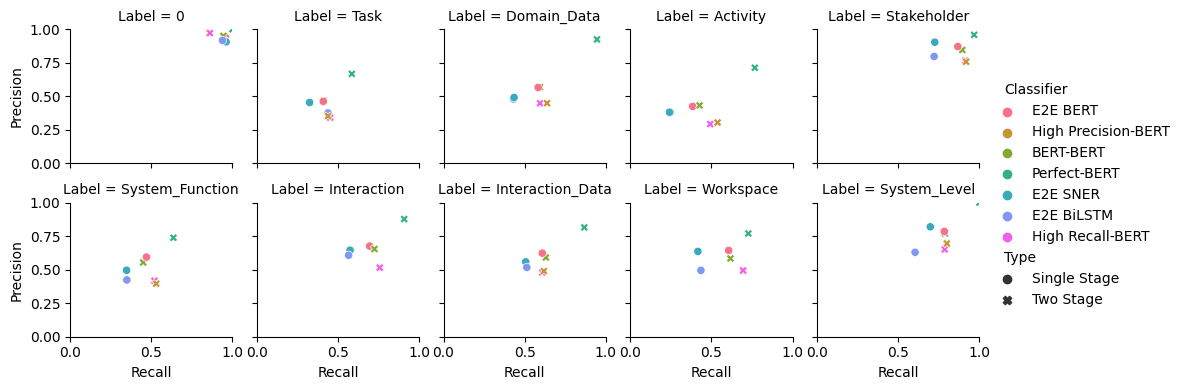

In [25]:
fg = sns.relplot(
    data=data,
    x="Recall",
    y="Precision",
    col="Label",
    hue="Classifier",
    style="Type",
    facet_kws={"margin_titles": True},
    col_wrap=5,
    height=2,
    kind="scatter",
)

fg.set(ylim=(0, 1))
fg.set(xlim=(0, 1))

fg.savefig(
    savepath.joinpath("per_label_performance.png"),
    bbox_inches="tight",
)

In [26]:
fg = sns.catplot(
    data=data,
    col="Label",
    row=["Precision",]
    y="Precision",
    kind="box",
    height=5,
    aspect=0.4,
)



SyntaxError: invalid syntax. Perhaps you forgot a comma? (1031511067.py, line 4)

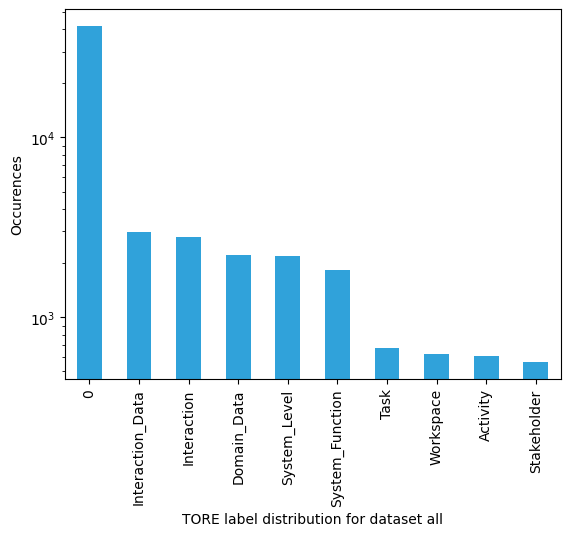

In [ ]:
from tooling.config import Experiment, Transformation
from tooling.loading import load_dataset, import_dataset
from tooling.config import SNERConfig, SNER
from omegaconf import OmegaConf
from copy import deepcopy
import os
import pandas as pd
from copy import deepcopy

from data.tooling import cleanup_files
from tooling.transformation import transform_dataset
from tooling.model import TORE_LABELS_NONE, LABELS_NONE
from pathlib import Path
import matplotlib.pyplot as plt

os.environ["DISABLE_MLFLOW"] = "1"

fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)

final_label_transformation_config = Transformation(
    description="None",
    type="Full",
    task="Task",
    domain_data="Domain_Data",
    activity="Activity",
    stakeholder="Stakeholder",
    system_function="System_Function",
    interaction="Interaction",
    interaction_data="Interaction_Data",
    workspace="Workspace",
    software="System_Level",
    internal_action="System_Level",
    internal_data="System_Level",
    system_level="System_Level",
)

dataset = "all"


base_experiment_config = Experiment(
    name="Base Config", iterations=1, force=False, dataset=dataset
)

cfg: SNERConfig = OmegaConf.structured(
    SNERConfig(
        sner=SNER(),
        experiment=base_experiment_config,
        transformation=final_label_transformation_config,
    )
)

run_name = f"dataset_stats_{dataset}"

transformed_dataset = transform_dataset(cfg, run_name, fill_with_zeros=True)[
    "dataset"
]

tore_label = transformed_dataset[["tore_label"]].value_counts()

ticks = [index[0] for index in tore_label.index.tolist()]

ax = tore_label.plot.bar(
    ax=axes,
    logy=True,
    xlabel=f"TORE label distribution for dataset {dataset}",
    ylabel="Occurences",
    xticks=range(len(ticks)),
)

ax.set_xticks(range(len(ticks)), ticks)

In [ ]:
tore_label

tore_label      
0                   41436
Interaction_Data     2978
Interaction          2805
Domain_Data          2218
System_Level         2179
System_Function      1826
Task                  672
Workspace             628
Activity              612
Stakeholder           562
Name: count, dtype: int64

In [ ]:
normalized.pivot(
    index="sentence_id", columns="tore_label", values="proportion"
).fillna(0).boxplot(
    ax=box_axes[idx],
    figsize=(20, 6),
    # subplots=False,
    showfliers=True,
    fontsize=8,
    ylabel="Per label occurence ratio",
    xlabel=f"Dataset {dataset}",
)


plt.show()